In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns  # Добавьте эту строку
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# @title Загружаем датафрейм
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data_july_2025.csv')
df['Daily Yield in %'] = (df['Close Price'] - df['Open Price']) / df['Open Price']
df['Grow'] = df['Close Price'] - df['Open Price']

df

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector,Daily Yield in %,Grow
0,2025-06-01,AAPL,185.96,187.79,188.85,183.74,42257183,2.931356e+12,28.37,0.49,6.62,248.20,155.68,Technology,0.009841,1.83
1,2025-06-01,ABBV,189.63,193.64,194.31,188.03,33074970,3.289227e+11,16.74,3.51,11.57,210.83,127.91,Healthcare,0.021146,4.01
2,2025-06-01,ABT,118.79,120.08,120.53,118.01,17130934,2.001333e+11,19.39,1.84,6.19,140.79,99.26,Healthcare,0.010859,1.29
3,2025-06-01,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology,-0.028622,-16.73
4,2025-06-01,ADP,253.46,255.60,258.59,249.91,10319559,1.052471e+11,29.92,2.04,8.54,303.75,234.28,Financials,0.008443,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,2025-07-23,VRTX,478.20,489.78,491.84,476.65,7141573,1.275469e+11,28.64,0.00,17.10,603.57,411.70,Healthcare,0.024216,11.58
4342,2025-07-23,VZ,46.61,47.75,48.26,46.15,9865947,1.856944e+11,9.31,5.82,5.13,53.28,40.22,Communication Services,0.024458,1.14
4343,2025-07-23,WMT,71.65,70.99,72.35,70.46,22059711,5.560056e+11,25.93,1.27,2.74,90.05,62.53,Consumer Staples,-0.009211,-0.66
4344,2025-07-23,XOM,117.02,112.37,118.45,111.41,13557718,4.403069e+11,15.72,3.09,7.15,122.66,100.50,Energy,-0.039737,-4.65


Проверяем однородность данных: убеждаемся что у нас есть ежедневные данные о 82 акциях. Это необходимо для того, чтобы рассуждения об объединении этих акций в индекс имели смысл.

In [ ]:
Kolvo= df.groupby('Date')['Ticker'].count()
Kolvo

,Ticker
Date,
2025-06-01,82
2025-06-02,82
2025-06-03,82
2025-06-04,82
2025-06-05,82
2025-06-06,82
2025-06-07,82
2025-06-08,82
2025-06-09,82


Kolvo= df.groupby('Date')['Grow'].count()
Kolvo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4346 non-null   object 
 1   Ticker            4346 non-null   object 
 2   Open Price        4346 non-null   float64
 3   Close Price       4346 non-null   float64
 4   High Price        4346 non-null   float64
 5   Low Price         4346 non-null   float64
 6   Volume Traded     4346 non-null   int64  
 7   Market Cap        4346 non-null   float64
 8   PE Ratio          4346 non-null   float64
 9   Dividend Yield    4346 non-null   float64
 10  EPS               4346 non-null   float64
 11  52 Week High      4346 non-null   float64
 12  52 Week Low       4346 non-null   float64
 13  Sector            4346 non-null   object 
 14  Daily Yield in %  4346 non-null   float64
 15  Grow              4346 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory

In [ ]:
# выделяем первый и последний день
quantity_of_stocks_1_Day = df[df['Date'] == '2025-06-01'][['Ticker', 'Open Price']]
quantity_of_stocks_last_Day = df[df['Date'] == '2025-07-23'][['Ticker', 'Close Price']]

# объединяем по Ticker
stock_grow = quantity_of_stocks_1_Day.merge(quantity_of_stocks_last_Day, on='Ticker')

# считаем рост
stock_grow['Grow'] = (stock_grow['Close Price'] - stock_grow['Open Price']) / stock_grow['Open Price']

print(stock_grow)


   Ticker  Open Price  Close Price      Grow
0    AAPL      185.96       198.96  0.069908
1    ABBV      189.63       183.77 -0.030902
2     ABT      118.79       117.15 -0.013806
3    ADBE      584.51       591.85  0.012558
4     ADP      253.46       244.98 -0.033457
..    ...         ...          ...       ...
77   VRTX      481.05       489.78  0.018148
78     VZ       44.88        47.75  0.063948
79    WMT       74.11        70.99 -0.042100
80    XOM      116.17       112.37 -0.032711
81    ZTS      152.40       148.32 -0.026772

[82 rows x 4 columns]


In [ ]:
Who_grow = stock_grow[stock_grow['Grow'] > 0]
print(len(Who_grow))
print(Who_grow)

44
   Ticker  Open Price  Close Price      Grow
0    AAPL      185.96       198.96  0.069908
3    ADBE      584.51       591.85  0.012558
6    AMGN      299.22       300.31  0.003643
7     AMT      202.28       213.08  0.053391
8    AMZN      166.23       178.46  0.073573
11   BKNG     3742.26      3757.90  0.004179
13    BMY       52.76        56.40  0.068992
14  BRK.B      431.90       453.05  0.048970
17     CB      237.87       239.90  0.008534
18   COST      876.35       884.57  0.009380
19    CRM      271.59       289.65  0.066497
20    CVX      158.18       158.20  0.000126
22    DUK      105.44       113.99  0.081089
24     GE      171.50       182.72  0.065423
27     GS      457.99       459.30  0.002860
29    HON      217.25       218.17  0.004235
30    IBM      186.67       202.74  0.086088
31   INTC       32.42        35.51  0.095312
33   ISRG      450.23       479.33  0.064634
35    JPM      207.75       210.62  0.013815
39    LOW      253.18       253.38  0.000790
41   MD

In [ ]:
Who_fall = stock_grow[stock_grow['Grow'] <= 0]
print(len(Who_fall))
print(Who_fall)


38
   Ticker  Open Price  Close Price      Grow
1    ABBV      189.63       183.77 -0.030902
2     ABT      118.79       117.15 -0.013806
4     ADP      253.46       244.98 -0.033457
5     AMD      165.43       156.59 -0.053436
9    AVGO     1698.77      1686.59 -0.007170
10    BAC       45.00        43.82 -0.026222
12    BLK      874.99       873.44 -0.001771
15      C       65.08        61.73 -0.051475
16    CAT      384.02       360.98 -0.059997
21    DIS      114.27       110.33 -0.034480
23    ELV      571.50       543.80 -0.048469
25   GILD       79.59        78.34 -0.015705
26  GOOGL      175.92       173.32 -0.014779
28     HD      377.18       347.03 -0.079935
32   INTU      672.27       608.84 -0.094352
34    JNJ      164.64       162.53 -0.012816
36     KO       69.69        63.99 -0.081791
37    LLY      964.42       955.44 -0.009311
38    LMT      487.43       463.78 -0.048520
40     MA      469.91       456.33 -0.028899
42    MDT       93.41        93.18 -0.002462
43   ME

In [69]:
## ТОП 10 по росту за месяц:
Top10_grow = (
    Who_grow.loc[Who_grow['Grow'] > 0, ['Ticker', 'Grow']]
    .sort_values(by='Grow', ascending=False)
    .head(10)
)

Grow_Mesuring = 0
for val in Top10_grow['Grow']:
    Grow_Mesuring+= val

print(Grow_Mesuring)
print('Top Grow:')
print(Top10_grow)


## ТОП 10 по падению за месяц:
Top10_fall = (
    stock_grow.loc[stock_grow['Grow'] < 0, ['Ticker', 'Grow']]
    .sort_values(by='Grow', ascending=True)
    .head(10)
)
Fall_Mesuring = 0
for val in Top10_fall['Grow']:
    Fall_Mesuring+= val

print(Fall_Mesuring)
print('Top Fall:')
print(Top10_fall)
Top10_grow.info()

0.8328550023902513
Top Grow:
   Ticker      Grow
75    UPS  0.136308
31   INTC  0.095312
54    PEP  0.089667
30    IBM  0.086088
22    DUK  0.081089
8    AMZN  0.073573
0    AAPL  0.069908
13    BMY  0.068992
19    CRM  0.066497
24     GE  0.065423
-0.6737870851926888
Top Fall:
   Ticker      Grow
32   INTU -0.094352
36     KO -0.081791
55    PFE -0.080635
28     HD -0.079935
67      T -0.075177
16    CAT -0.059997
5     AMD -0.053436
15      C -0.051475
38    LMT -0.048520
23    ELV -0.048469
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 75 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  10 non-null     object 
 1   Grow    10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


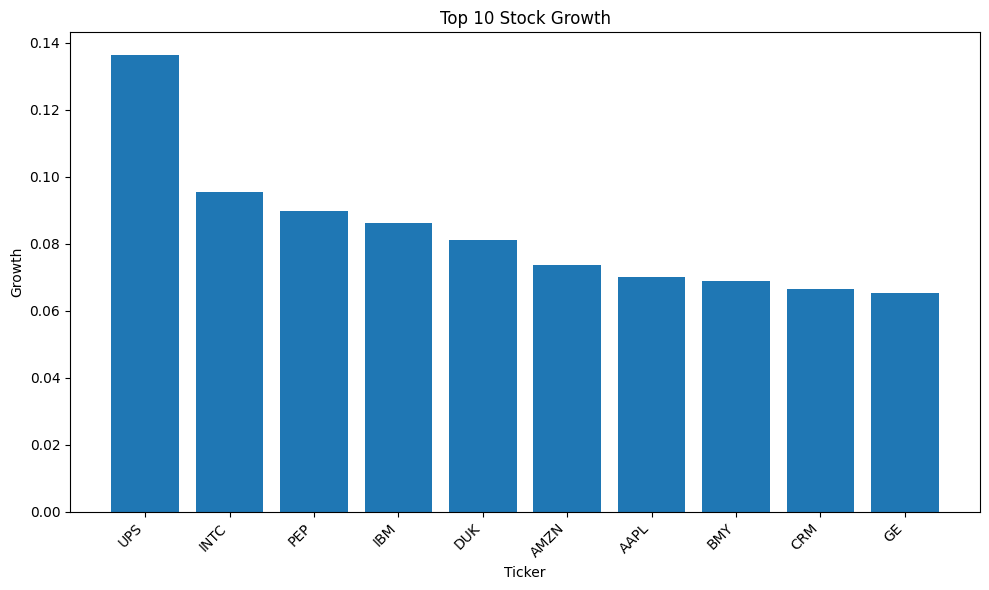

Количество подоражавших компаний: 44


In [ ]:
# @title Посмотрим на топы компаний и построим график колебаний их P/E индекса для поиска потенциально переоценённых и недооценённых активов

plt.figure(figsize=(10, 6))
plt.bar(Top10_grow['Ticker'], Top10_grow['Grow'])
plt.xlabel('Ticker')
plt.ylabel('Growth')
plt.title('Top 10 Stock Growth')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Количество подоражавших компаний: {len(Who_grow)}")

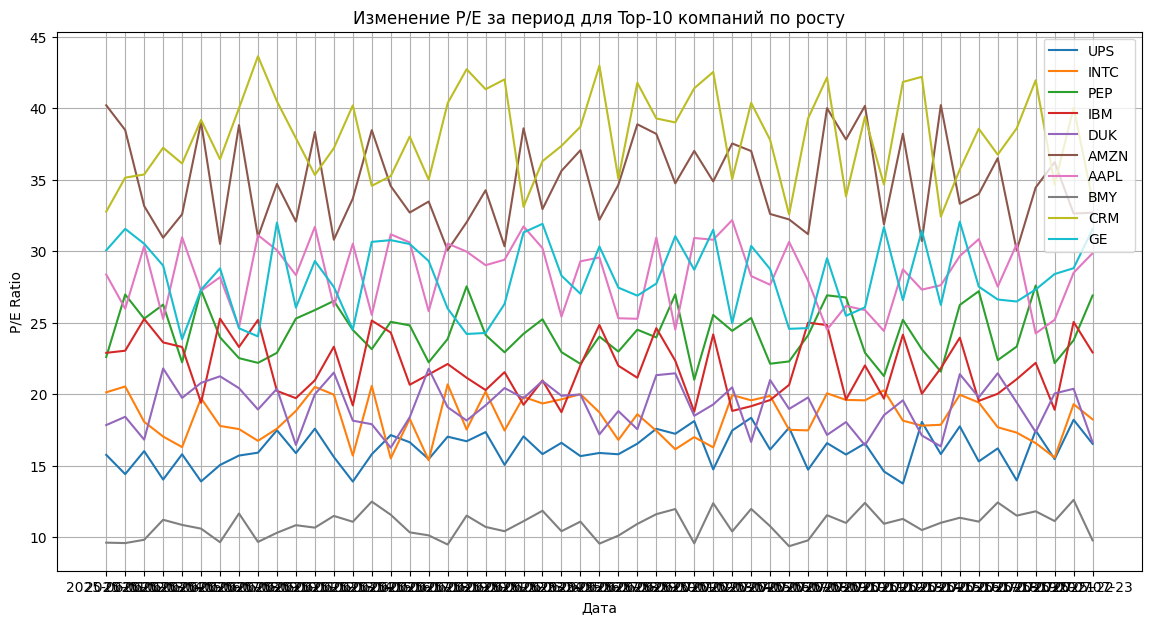

In [71]:
top10_tickers = Top10_grow['Ticker'].tolist()

df_top10 = df[df['Ticker'].isin(top10_tickers)]

# строим графики P/E по компаниям
plt.figure(figsize=(14, 7))
for ticker in top10_tickers:
    company_data = df_top10[df_top10['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['PE Ratio'], label=ticker)

plt.title('Изменение P/E за период для Top-10 компаний по росту')
plt.xlabel('Дата')
plt.ylabel('P/E Ratio')
plt.legend()
plt.grid(True)
plt.show()


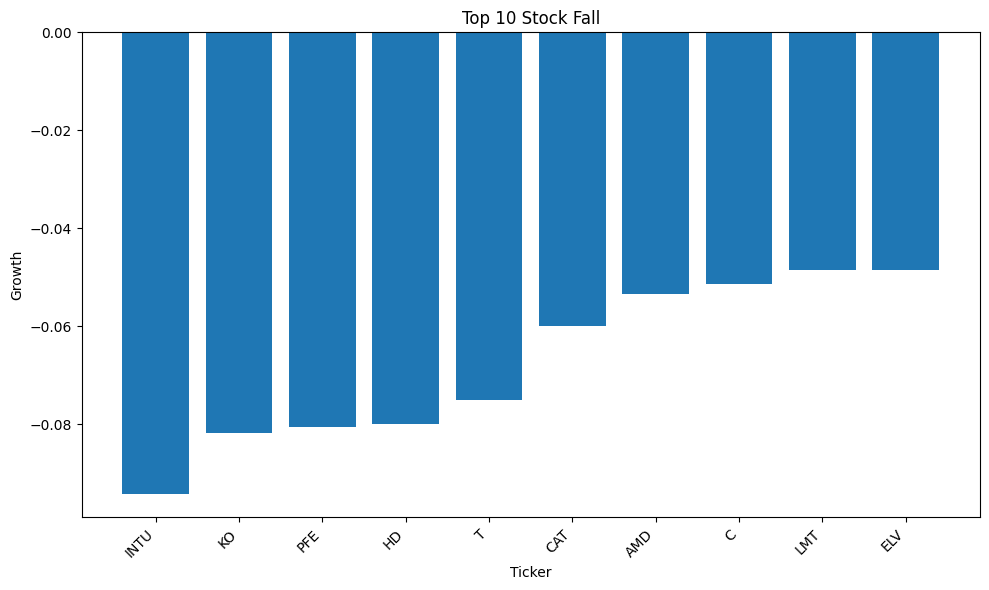

Количество подешевевших компаний: 38


In [ ]:
# @title Посмотрим на топ падающих компаний:
## построить график для падения

plt.figure(figsize=(10, 6))
plt.bar(Top10_fall['Ticker'], Top10_fall['Grow'])
plt.xlabel('Ticker')
plt.ylabel('Growth')
plt.title('Top 10 Stock Fall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Количество подешевевших компаний: {len(Who_fall)}")

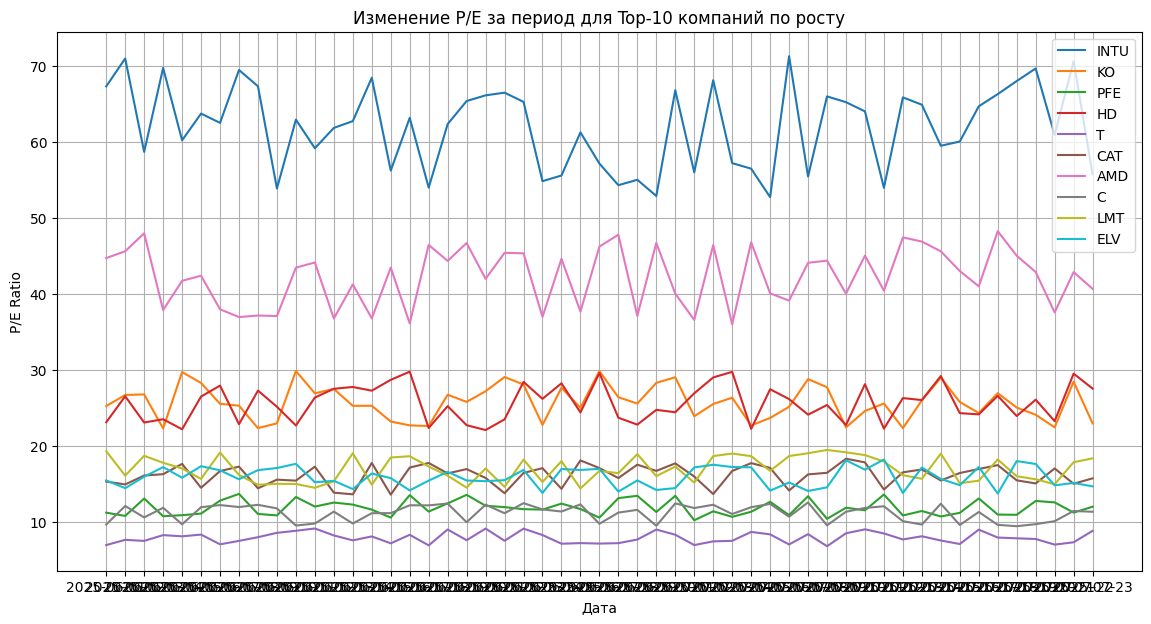

In [72]:
import matplotlib.pyplot as plt

# выбираем только 10 тикеров из Top10_grow
top10_tickers2 = Top10_fall['Ticker'].tolist()

# фильтруем основной df
df_top10 = df[df['Ticker'].isin(top10_tickers2)]

# строим графики P/E по компаниям
plt.figure(figsize=(14, 7))
for ticker in top10_tickers2:
    company_data = df_top10[df_top10['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['PE Ratio'], label=ticker)

plt.title('Изменение P/E за период для Top-10 компаний по росту')
plt.xlabel('Дата')
plt.ylabel('P/E Ratio')
plt.legend()
plt.grid(True)
plt.show()


Рассмотрим данные акции как единый индекс и проведем его анализ:


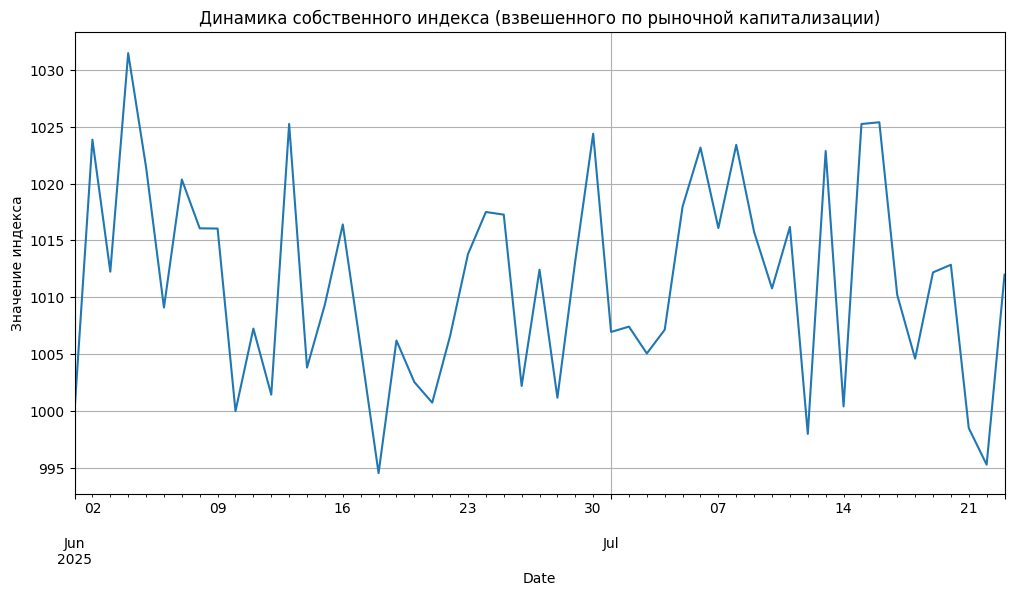

Волатильность вашего индекса: 19.30%


In [ ]:
# @title Рассмотрим данные компании как единый индекс, рассчитаем его волатильность, а также построим график и определим кто сейчас управляет: быки, или медведи
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Date', 'Ticker'])
# Группируем по дате и суммируем капитализацию
total_market_cap_per_day = df.groupby('Date')['Market Cap'].sum().to_frame('Total_Market_Cap')
base_date = total_market_cap_per_day.index.min()
base_value = 1000  # Начальное значение индекса
base_market_cap = total_market_cap_per_day.loc[base_date, 'Total_Market_Cap']
# Присоединяем общую капитализацию к исходному датафрейму (для проверки)
df_with_total_cap = df.merge(total_market_cap_per_day, on='Date')

# Рассчитываем значение индекса для каждой строки
df_with_total_cap['Index_Value'] = (df_with_total_cap['Total_Market_Cap'] / base_market_cap) * base_value

# Для получения итогового индекса просто возьмем уникальные значения по датам
your_custom_index = df_with_total_cap.groupby('Date')['Index_Value'].first()

# Построим график индекса
plt.figure(figsize=(12, 6))
your_custom_index.plot(title='Динамика собственного индекса (взвешенного по рыночной капитализации)')
plt.ylabel('Значение индекса')
plt.grid(True)
plt.show()

# Теперь можно считать доходность и волатильность ЭТОГО индекса
index_daily_returns = your_custom_index.pct_change().dropna()
daily_volatility = index_daily_returns.std()
annual_volatility = daily_volatility * (252 ** 0.5)

print(f"Волатильность вашего индекса: {annual_volatility:.2%}")

Рост индекса позволяет сказать что сейчас бычий рынок.

Проведем BREDTH анализ, для оценки качества растущего рынка:

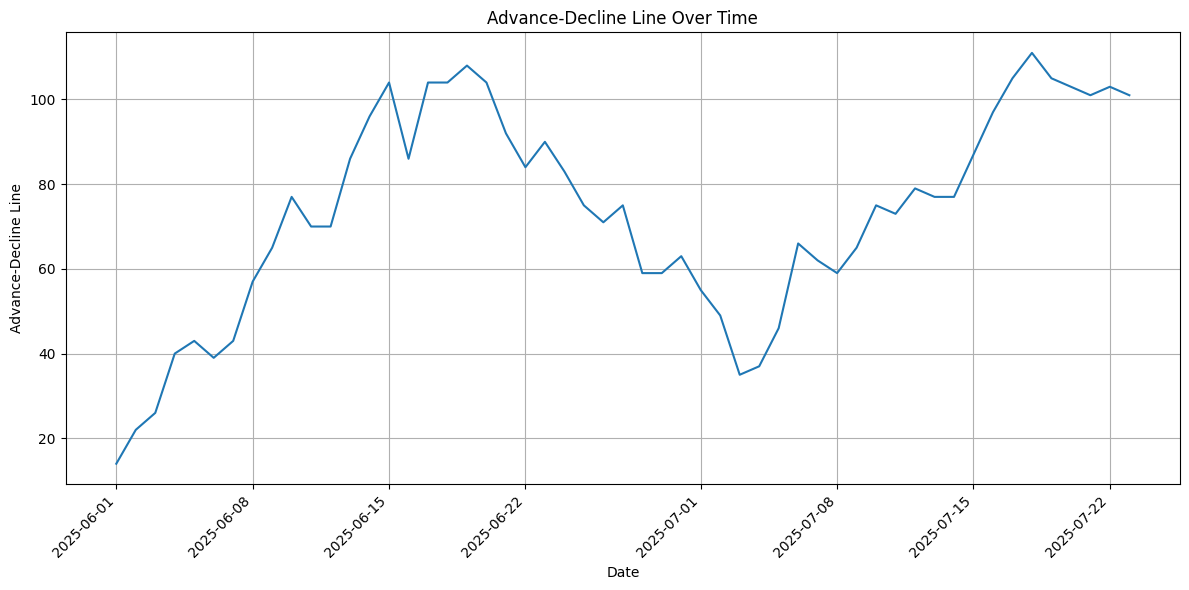

In [ ]:
# @title Построим Ad-line:
# Calculate Daily Advances and Declines
daily_ad = df.groupby('Date')['Grow'].agg(
    advances=lambda x: (x > 0).sum(),
    declines=lambda x: (x < 0).sum()
).reset_index()

# Calculate Daily A/D Value
daily_ad['AD_Value'] = daily_ad['advances'] - daily_ad['declines']

# Calculate Cumulative A/D Line
daily_ad['AD_Line'] = daily_ad['AD_Value'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(daily_ad['Date'], daily_ad['AD_Line'])
plt.xlabel('Date')
plt.ylabel('Advance-Decline Line')
plt.title('Advance-Decline Line Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)

# Improve date formatting on x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

Видим, что большинство компаний растут, вместе с индексом, что дает причину говорить что рынок "здоров" и толкается вперед не горсткой компаний с большой капитализацией, а большинством


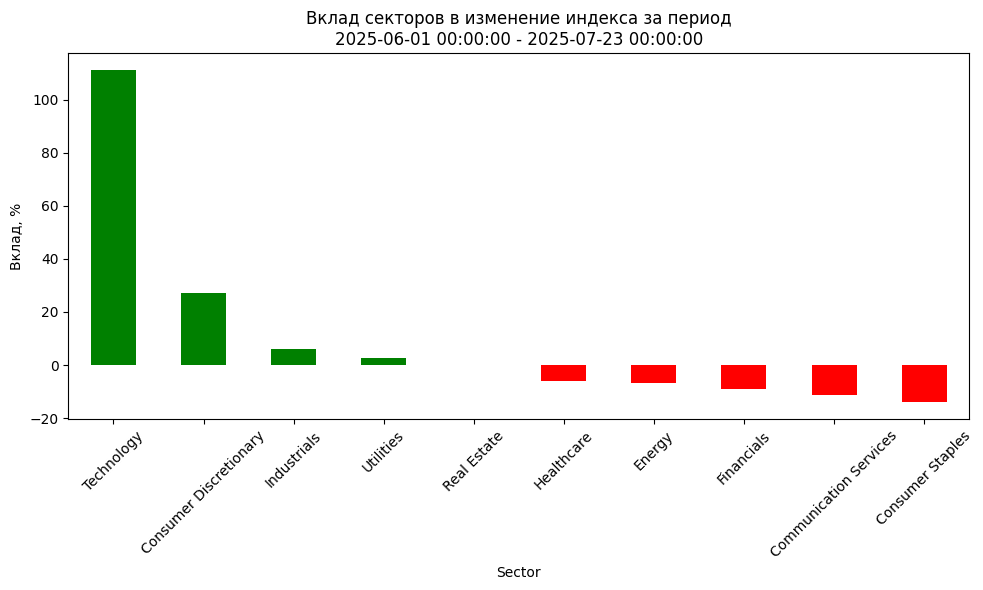

In [ ]:
# @title Посмотрим на рост секторов
# 1. Находим первую и последнюю дату в периоде
start_date = df['Date'].min()
end_date = df['Date'].max()

# 2. Агрегируем данные по секторам на начальную и конечную даты
sector_cap_start = df[df['Date'] == start_date].groupby('Sector')['Market Cap'].sum()
sector_cap_end = df[df['Date'] == end_date].groupby('Sector')['Market Cap'].sum()

# 3. Рассчитываем абсолютное изменение капитализации по каждому сектору
sector_change_abs = sector_cap_end - sector_cap_start

# 4. Рассчитываем общее изменение капитализации всего индекса
total_change_abs = sector_change_abs.sum()

# 5. Рассчитываем ВКЛАД каждого сектора в общее изменение (в процентных пунктах)
sector_contribution_pct = (sector_change_abs / total_change_abs) * 100

# 6. Сортируем и визуализируем
sector_contribution_pct.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sector_contribution_pct.plot(kind='bar', color=(sector_contribution_pct > 0).map({True: 'g', False: 'r'}))
plt.title(f'Вклад секторов в изменение индекса за период\n{start_date} - {end_date}')
plt.ylabel('Вклад, %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

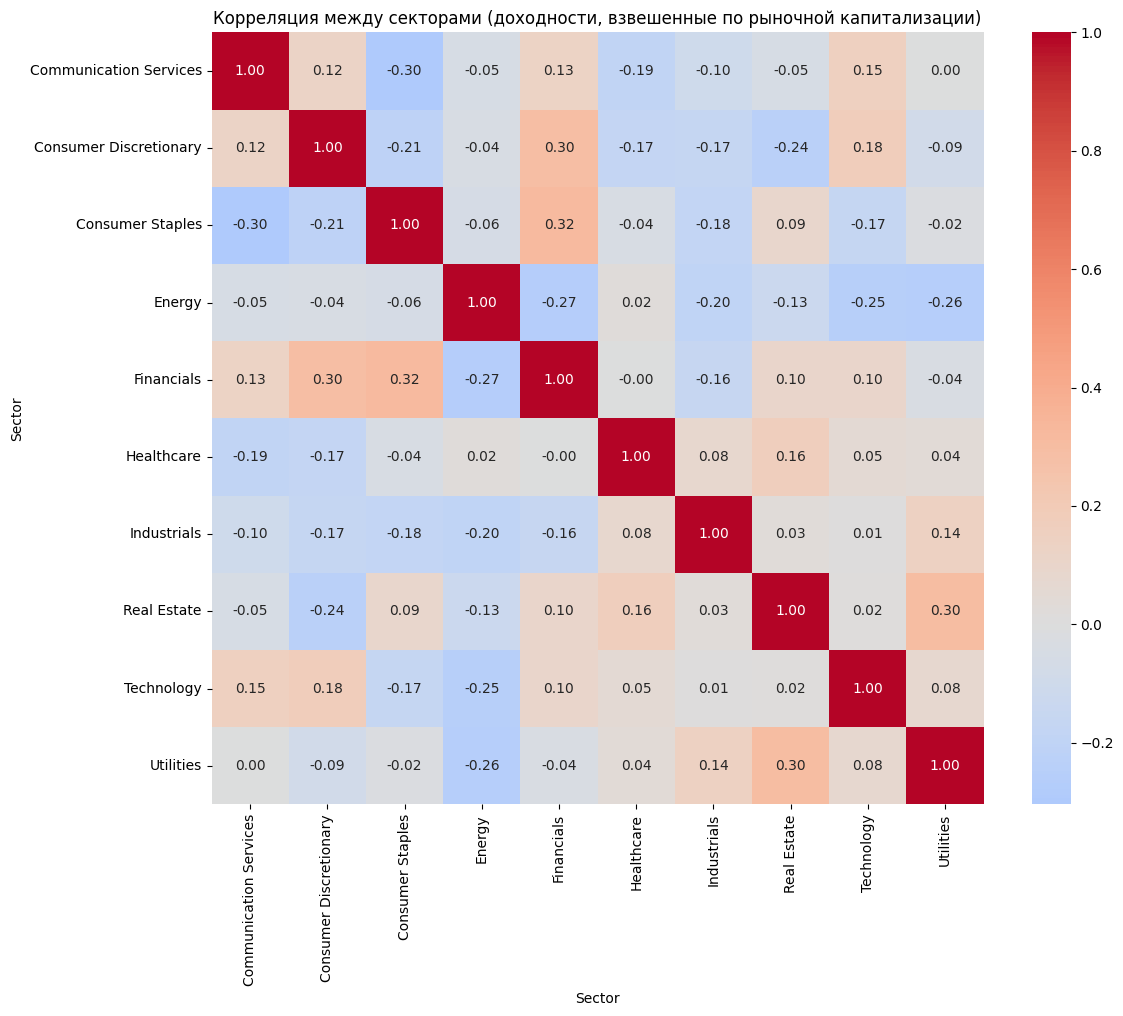

In [ ]:
# @title Построим headmap, чтобы оценить корреляцию роста/падения секторов друг с другом
#  Рассчитываем общую капитализацию каждого сектора на каждую дату
sector_daily_mcap = df.groupby(['Date', 'Sector'])['Market Cap'].sum().reset_index()

#  Сортируем по сектору и дате (это важно для shift!)
sector_daily_mcap = sector_daily_mcap.sort_values(['Sector', 'Date'])

# Для каждого сектора рассчитываем дневную доходность на основе изменения общей капитализации
# Это аналог: (Капитализация_сектора_сегодня / Капитализация_сектора_вчера) - 1
sector_daily_mcap['Sector_Return'] = sector_daily_mcap.groupby('Sector')['Market Cap'].pct_change()

# Удаляем строки с NaN (первый день для каждого сектора)
sector_returns_clean = sector_daily_mcap.dropna(subset=['Sector_Return'])

#  Создаем сводную таблицу для корреляции
pivot_returns = sector_returns_clean.pivot_table(
    index='Date',
    columns='Sector',
    values='Sector_Return',
    aggfunc='mean' # на одну дату - один сектор - одно значение return
)

#  Считаем и визуализируем корреляцию
corr_matrix = pivot_returns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title('Корреляция между секторами (доходности, взвешенные по рыночной капитализации)')
plt.tight_layout()
plt.show()

Анализ headmapa показывает что указывает взаимосвязь между секторами слабая.

Это позволяет сделать вывод о том, что в течениие данного периода динамика секторов в основном определялась внутриотраслевыми факторами, а не общерыночными трендами или мощными макроэкономическими событиями.

Наличие умеренной положительной корреляции ( максимальное значение - 0,32) может свидетельствовать об общей чувствительности. Слабые отрицательные корреляции могут быть признаком перетекания капитала между секторами.
